# Mission Dotlas 🌎 (40 points)

![Dotlas](https://camo.githubusercontent.com/6a3a3a9e55ce6b5c4305badbdc68c0d5f11b360b11e3fa7b93c822d637166090/68747470733a2f2f646f746c61732d776562736974652e73332e65752d776573742d312e616d617a6f6e6177732e636f6d2f696d616765732f6769746875622f62616e6e65722e706e67)

### 1.1 Overview ✉️

Welcome to your mission! In this notebook, you will download a dataset containing restaurants' information in the state of California, US. The dataset will then be transformed, processed and prepared in a required format. This clean dataset will then be used to answer some analytical questions and create a few data visualizations in Python.

This is a template notebook that has some code already filled-in to help you on your way. There are also cells that require you to fill in the python code to solve specific problems. There are sections of the notebook that contain a points tally for code written. 

**Each section of this notebook is largely independent, so if you get stuck on a problem you can always move on to the next one.**

### 1.2 Tools & Technologies 🪛

- This exercise will be carried out using the [Python](https://www.python.org/) programming language and will rely hevily on the [Pandas](https://pandas.pydata.org/) library for data manipulation.
- You may use any of [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) or [Plotly](https://plotly.com/python/) packages for data visualization.
- We will be using [Jupyter notebooks](https://jupyter.org/) to run Python code in order to view and interact better with our data and visualizations.
- You are free to use [Google Colab](https://colab.research.google.com/) which provides an easy-to-use Jupyter interface.
- When not in Colab, it is recommended to run this Jupyter Notebook within an [Anaconda](https://continuum.io/) environment
- You can use any other Python packages that you deem fit for this project.

> ⚠ **Ensure that your Python version is 3.9 or higher**

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Blue_Python_3.9_Shield_Badge.svg)

**Language**

![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)

**Environments & Packages**

![Anaconda](https://img.shields.io/badge/Anaconda-%2344A833.svg?style=for-the-badge&logo=anaconda&logoColor=white)
![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)
![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-%23ffffff.svg?style=for-the-badge&logo=Matplotlib&logoColor=black)
![Plotly](https://img.shields.io/badge/Plotly-%233F4F75.svg?style=for-the-badge&logo=plotly&logoColor=white)

**Data Store**

![AWS](https://img.shields.io/badge/AWS-%23FF9900.svg?style=for-the-badge&logo=amazon-aws&logoColor=white)

---

### 2.1 Read California Restaurants 🔍 (3 points)

In this section, we will load the dataset from [AWS](https://googlethatforyou.com?q=amazon%20web%20services), conduct an exploratory data analysis and then clean up the dataset


- Ensure that pandas and plotly are installed (possibly via pip or poetry)
- The dataset is about 300 MB in size and time-to-download depends on internet speed and availability
- Download the dataset using Python into this notebook and load it into a pandas dataframe (without writing to file)

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import plotly.express as px
import numpy as np
import urllib.request, json 
import pandas as pd
from io import StringIO
from html.parser import HTMLParser
from math import sin, cos, sqrt, atan2, radians
import pprint
pp = pprint.PrettyPrinter(indent=4)


CELL_HEIGHT: int = 50

# Initialize helpers to ignore pandas warnings and resize columns and cells
pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', CELL_HEIGHT)

DATA_URL: str = "https://dotlas-marketing.s3.amazonaws.com/interviews/california_restaurants.json"

In [0]:

# ✏️ YOUR CODE HERE
with urllib.request.urlopen(DATA_URL) as url:
  data = json.loads(url.read().decode())


df=pd.DataFrame(data)

Create a restaurant ID column to uniquely index each restaurant

In [0]:
df["restaurant_id"] = range(1, len(df) + 1)
df.head(2)

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-830148162643710> in <module> 
 ----> 1 df [ "restaurant_id" ] = range ( 1 , len ( df ) + 1 ) 
 2 df . head ( 2 ) 

 NameError : name 'df' is not defined

### 2.2 Basic Operations 🔧 (4 points)

#### 2.2.1 Restaurants by City 🌆 (1 point)

For each city in california, find

1. the number of restaurants in that city,
2. mean `rating` of all restaurants in the city,
3. mean `price_range_id` per city,
4. mean `maximum_days_advance_for_reservation` per city

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| city          | restaurant_count | avg_rating | avg_price_range_id | avg_reservation_advance |
| :------------ | ---------------: | ---------: | -----------------: | ----------------------: |
| San Francisco |             1645 |    2.59343 |             2.3617 |                 90.3453 |
| Los Angeles   |             1604 |    2.31995 |            2.29052 |                  86.692 |
| San Diego     |             1034 |    2.65493 |            2.28723 |                 94.5783 |
| San Jose      |              372 |    1.54597 |            2.16398 |                 88.3011 |
| Sacramento    |              329 |    1.68663 |            2.26748 |                 95.0274 |

In [0]:
df1=df.groupby('city').agg({'city':['count'],'rating':['mean'],'price_range_id':['mean'],'maximum_days_advance_for_reservation':['mean']}).copy()
df1.columns=list(map(''.join, df1.columns.values))
df1.rename(columns={'citycount':'restaurant_count','ratingmean':'avg_rating','price_range_idmean':'avg_price_range_id','maximum_days_advance_for_reservationmean':'avg_reservation_advance'},inplace=True)
df1.sort_values(by=['restaurant_count'],ascending=False,inplace=True)

df1.head()

Out[4]:

,restaurant_count,avg_rating,avg_price_range_id,avg_reservation_advance
city,,,,
San Francisco,1645,2.593435,2.361702,90.345289
Los Angeles,1604,2.319950,2.290524,86.692020
San Diego,1034,2.654932,2.287234,94.578337
San Jose,372,1.545968,2.163978,88.301075
Sacramento,329,1.686626,2.267477,95.027356


#### 2.2.2 Restaurants by Brand 🍔 (1 point)

For each brand (`brand_name`) in california, find

1. the number of restaurants that belong to that brand,
2. mean `price_range_id` of the brand across its restaurants

sort by number of restaurants.

The resulting dataframe's top 5 rows would look as follows:

| brand_name               | restaurant_count | avg_price_range_id |
| :----------------------- | ---------------: | -----------------: |
| Denny's                  |               73 |                  2 |
| Ihop                     |               37 |                  2 |
| Buffalo Wild Wings       |               32 |                  2 |
| Black Bear Diner         |               28 |                  2 |
| Coco's Bakery Restaurant |               24 |                  2 |

In [0]:
df2=df.groupby('brand_name').agg({'brand_name':['count'],'price_range_id':['mean']}).copy()
df2.columns=list(map(''.join, df2.columns.values))
df2.rename(columns={'brand_namecount':'restaurant_count','price_range_idmean':'avg_price_range_id'},inplace=True)
df2.sort_values(by=['restaurant_count'],ascending=False,inplace=True)
df2.head(5)

Out[5]:

,restaurant_count,avg_price_range_id
brand_name,,
Denny's,73,2.0
Ihop,37,2.0
Buffalo Wild Wings,32,2.0
Black Bear Diner,28,2.0
Coco's Bakery Restaurant,24,2.0


#### 2.2.3 Visualize Brands 📊 (2 points)

Create a bar chart of top 5 brands in california by average number of reviews where each brand has at least 5 restaurants

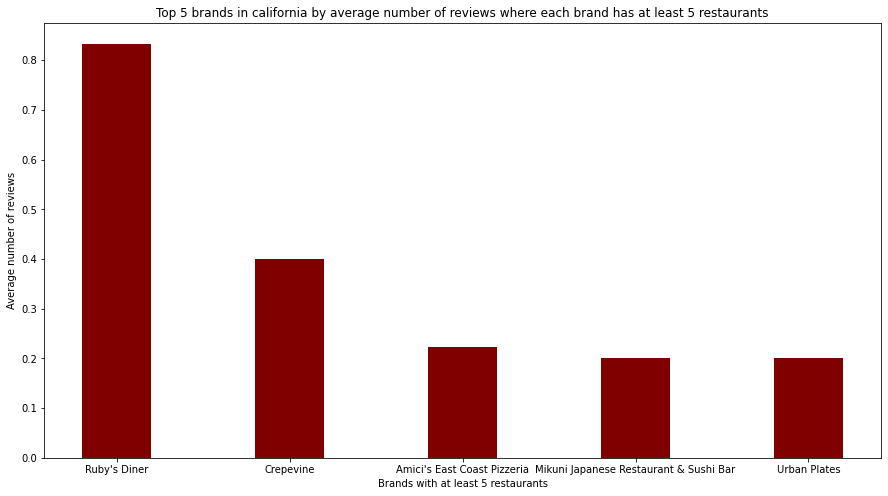

In [0]:
df3=df.groupby('brand_name').agg({'brand_name':['count'],'review_count':['mean']}).copy()
df3.columns=list(map(''.join,df3.columns.values))
df3=df3.loc[(df3['brand_namecount']>=5),:]
df3.sort_values(by=['review_countmean'],ascending=False,inplace=True)
# df3.head(5)
fig = plt.figure(figsize = (15, 8))
plt.bar(list(df3.index[:5]), df3['review_countmean'][:5].values, color ='maroon',
        width = 0.4)

plt.xlabel("Brands with at least 5 restaurants")
plt.ylabel("Average number of reviews")
plt.title("Top 5 brands in california by average number of reviews where each brand has at least 5 restaurants")
plt.show()

### 2.3 Transform Columns 🚚 (15 Points)

<img src="https://media.giphy.com/media/2f41Z7bhKGvbG/giphy.gif" height="250px" width="250px" alt="harry potter">

#### 2.3.1 Safety Precautions 🦺 (2 points)

Transform the entire safety precautions column into a new column based on the following rule:

Convert from dictionary to list. Only include in the list, those keys in the dictionary which are true.
For ex, for safety precautions of the type:

```python
{
    'cleanMenus': True,
    'limitedSeating': False,
    'sealedUtensils': None,
    'prohibitSickStaff': True,
    'requireDinerMasks': True,
    'staffIsVaccinated': None,
    'proofOfVaccinationRequired': False,
    'sanitizerProvidedForCustomers': None
}
```

It should turn into a list of the form:

```python
["Clean Menus", "Prohibit Sick Staff", "Require Diner Masks"]
```

In [0]:
def camelCase_to_required_case(sentence):
  new=''                       
  first=True
  for ch in sentence:
    if ch.isupper() is True:
      new+=" "
    if first:
      first=False
      ch=ch.upper()
    new+=ch
  return new

def snake_case_to_required_case(word):
  temp=word.split('_')
  temp=' '.join(temp)
  return temp

def create_new_safety_prcautions_col(dicty, snake_case):
  if not snake_case:
    new_cell=[camelCase_to_required_case(key) for key,value in dicty.items() if value is True]
  else:
    new_cell=[snake_case_to_required_case(key) for key,value in dicty.items() if value is True]

  return new_cell

vect_func=np.vectorize(create_new_safety_prcautions_col, otypes=[object]) 
  
new_safety_precautions=vect_func(df['safety_precautions'].values, False)
new_checklist=vect_func(df['checklist'].values, True)
df['safety_precautions']=new_safety_precautions
df['checklist']=new_checklist



  

#### 2.3.2 Clean up HTML text 🥜 (2 points)

Find columns containing text / strings that have html text and remove those HTML texts

ex:

```html
<p>
  Feast on delicious grub at Jerry's Famous Deli.<br />
  Its retro-style casual setting features comfortable booth seating.
</p>
```

to:

```
Feast on delicious grub at Jerry's Famous Deli. Its retro-style casual setting features comfortable booth seating.
```

In [0]:
#https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    if html is not None:
      s.feed(html)
      return s.get_data()
    else:
      return ''
  
strip_tags=np.vectorize(strip_tags, otypes=[object])
probable_html_columns=['operating_hours','description','address','price_range','entertainment','public_transit','parking_info','dress_code']


for col in probable_html_columns:
  new_col=strip_tags(df[col])
  df[col]=new_col

  

#### 2.3.3 Imputing 📈 (3 points)

Fill up missing values for rating, rating count and review count by imputing based on the following columns in order:

1. `brand_name`
2. `area`
3. `city`

This means that if `rating` is missing for a restaurant (null / 0), but that restaurant is part of a brand where
other restaurants of the same brand have ratings, then a median rating is taken. If brands are complete, then missing values are filled using
area where the restaurant is located (median rating) and finally filled using the city's rating

In [0]:
df4=df.groupby('brand_name',dropna=False).agg({'rating':['median'],'rating_count':['median'],'review_count':['median']}).copy()
df4.columns=list(map(''.join, df4.columns.values))
brand_name_values={}
for brand, row in df4.iterrows():
  brand_name_values[brand]={'rating':row[0], 'rating_count':row[1],'review_count':row[2]}


df5=df.groupby('area',dropna=False).agg({'rating':['median'],'rating_count':['median'],'review_count':['median']}).copy()
df5.columns=list(map(''.join, df5.columns.values))
area_values={}
for area, row in df5.iterrows():
  area_values[area]={'rating':row[0], 'rating_count':row[1],'review_count':row[2]}

df6=df.groupby('city',dropna=False).agg({'rating':['median'],'rating_count':['median'],'review_count':['median']}).copy()
df6.columns=list(map(''.join, df6.columns.values))
city_values={}
for city, row in df6.iterrows():
  city_values[city]={'rating':row[0], 'rating_count':row[1],'review_count':row[2]}
  


def choice_maker(key, brand, area, city, key_value):
  ans=0
  if key_value!=0:
    return key_value
  if brand_name_values[brand][key]!=0:
    ans=brand_name_values[brand][key]
  elif area_values[area][key]!=0:
    ans=area_values[area][key]
  elif city_values[city][key]!=0:
    ans=city_values[city][key]
  else:
    ans=0
  return ans
  
choice_maker=np.vectorize(choice_maker, otypes=[float])

imputed_rating=choice_maker('rating',df['brand_name'].values,df['area'].values,df['city'].values,df['rating'].values)
imputed_rating_count=choice_maker('rating_count',df['brand_name'].values,df['area'].values,df['city'].values,df['rating_count'].values)
imputed_review_count=choice_maker('review_count',df['brand_name'].values,df['area'].values,df['city'].values,df['review_count'].values)

df['rating']=imputed_rating
df['rating_count']=imputed_rating_count
df['review_count']=imputed_review_count




#### 2.3.4 Analytical Transformations (8 points)

Choose any one sub-section only to answer. The choice is yours

<img src="https://media.giphy.com/media/SCt3Miv6ugvSg/giphy.gif" height="250px" width="250px" alt="the matrix">

##### 2.3.4a Operating Hours 🕰️

Create an operating hours [bitmap](https://en.wikipedia.org/wiki/Bit_array) column from the operating hours text column for all restaurants. The bitmap would be a matrix of size 24 x 7 where a 1 or 0 on each cell indicates whether the restaurant is operating on a specific day at a specific hour

Example: For operating hours text of the form:

```tex
Lunch
Daily 11:00 am–3:30 pm
Dinner
Daily 4:30 pm–11:30 pm
```

Create a bitmap of the following form:

```json
{
    "Monday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    "Tuesday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],
    .
    .
    .
    "Sunday" : [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1],

}
```

In [0]:
# ✏️ YOUR CODE HERE

##### 2.3.4b On my radar 🗺️

For the following restaurant:

- brand_name `Calzone's Pizza Cucina`
- coordinates `37.799068, -122.408226`.

Answer these questions:

- How many restaurants exist within a 100 meter radius of this restaurant?
- What is the most frequent cuisine (`category`) occurence in this 100m radius across the restaurants that exist in that range?

In [0]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude/43211266#43211266
def get_dist(lat,lon):
  # approximate radius of earth in km
  R = 6373.0

  lat1 = radians(37.799068)
  lon1 = radians(-122.408226)
  lat2 = radians(lat)
  lon2 = radians(lon)

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  distance = R * c*1000
  
  if distance<100:
    return True
  else:
    return False


get_dist=np.vectorize(get_dist,otypes=[bool])

df['dist_bool_col']=get_dist(df['latitude'],df['longitude'])

ans1=len(df.loc[(df['dist_bool_col'] == True),['categories']])

freq={}

for idx, row in df.loc[(df['dist_bool_col'] == True),['categories']].iterrows():
  for category in row[0]:
    if category in freq:
      freq[category]+=1
    else:
      freq[category]=1

print(ans1,end='\n')
cusine=''
mx=0

for key,value in freq.items():
  if value>mx:
    cusine=key
    mx=value
print(cusine)
  


21
Italian

---

Remember to hydrate and 

[![Spotify](https://img.shields.io/badge/Spotify-1ED760?style=for-the-badge&logo=spotify&logoColor=white)](https://open.spotify.com/playlist/3d4bU6GAelt3YL2L1X2SOn)

---

### 2.4 Menu-Level Table 🧾 (8 points)

<img src="https://media.giphy.com/media/qpLuA97QGOsnK/giphy.gif" height="250px" width="250px" alt="ratatouille">

**Create a menu-level table by parsing out menu items from the `menu` column per restaurant.**

Every restaurant has a `menu` column that contains deeply nested JSON data on the restaurant's menu. The hierarchy is as follows: 

* One restaurant can have multiple menus (morning menu, evening menu, etc.)
    * Each menu can have a description and provider
* Each restaurant menu can have multiple sections (such as Appetizers, Desserts, etc.)
    * Each section has a description
* Each section can have multiple menu items (such as Latte, Apple Pie, Carrot Halwa, etc.)
    * Each menu item has a price, currency and description

You need to parse out the menu data from the JSON in the `menu` column for each restaurant and have a restaurants x menu table as shown below. 

| restaurant_id | menu_name | menu_description | menu_provider | section_name | section_description | item_name          | item_description                                                                                                      | item_price | item_price_currency |
| ------------: | :-------- | :--------------- | ------------: | :----------- | :------------------ | :----------------- | :-------------------------------------------------------------------------------------------------------------------- | ---------: | :------------------ |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Egg Rolls          | Deep fried mixed veggie egg rolls served with sweet & sour sauce                                                      |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Tofu         | (Contains Peanut) Deep fried tofu, served with sweet & sour sauce and crushed peanut                                  |          8 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Fried Meat Balls   | Deep fried fish, pork, beef balls or mixed served with sweet & sour sauce. Meat: Beef $1, Fish, Mixed Meat ball, Pork |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Pork Jerky         | Deep fried marinated pork served with special jaew sauce                                                              |        8.5 | USD                 |
|             1 | Main Menu |                  |           nan | Appetizers   |                     | Thai Isaan Sausage | (Contains Peanut) Thai Style sausage served with fresh vegetables and peanuts                                         |          9 | USD                 |

In [0]:
total=[]
def menu_parser(restaurant_id, full_menu):
  if full_menu is None:
    new_entry=[np.nan for _ in range(10)]
    new_entry[0]=restaurant_id
    total.append(new_entry) 
    return
  
  for menu in full_menu:
    for section in menu['sections']:
      for item in section['items']:
        new_entry=[np.nan for _ in range(10)]
        new_entry[0]=restaurant_id
        
        if 'name' in menu:
          new_entry[1]=menu['name']
        if 'description' in menu:
          new_entry[2]=menu['description']
        if 'provider' in menu:
          new_entry[3]=menu['provider']
        if 'name' in section:
          new_entry[4]=section['name']
        if 'description' in section:
          new_entry[5]=section['description']
        if 'name' in item:
          new_entry[6]=item['name']
        if 'description' in item:
          new_entry[7]=item['description']
        if 'price' in item and item['price'] is not None: 
          if 'value' in item['price']:
            new_entry[8]=item['price']['value']
          if 'currency_code' in item['price']:
            new_entry[9]=item['price']['currency_code']
        total.append(new_entry.copy())
  

menu_parser=np.vectorize(menu_parser, otypes=None)

menu_parser(df['restaurant_id'].values,df['menu'].values)
menu_df=pd.DataFrame(data=total, columns=['restaurant_id','menu_name','menu_description','menu_provider','section_name','section_description','item_name','item_description','item_price','item_price_currency'])

menu_df.head()
        
  

--------------------------------------------------------------------------- 
 KeyError Traceback (most recent call last)
 /databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc (self, key, method, tolerance) 
 3360 try : 
 -> 3361 return self . _engine . get_loc ( casted_key ) 
 3362 except KeyError as err : 

 /databricks/python/lib/python3.8/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc () 

 /databricks/python/lib/python3.8/site-packages/pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc () 

 pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item () 

 pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item () 

 KeyError : 'restaurant_id'

The above exception was the direct cause of the following exception:

 KeyError Traceback (most recent call last)
 <command-830148162643734> in <module> 
 37 menu_parser = np . vectorize ( menu_parser , otypes = None ) 
 38 
 ---> 39 menu_parser ( df [ 'restaurant_id' ] . values , df [ 'menu' ] . values ) 
 40 menu_df = pd . DataFrame ( data = total , columns = [ 'restaurant_id' , 'menu_name' , 'menu_description' , 'menu_provider' , 'section_name' , 'section_description' , 'item_name' , 'item_description' , 'item_price' , 'item_price_currency' ] ) 
 41 

 /databricks/python/lib/python3.8/site-packages/pandas/core/frame.py in __getitem__ (self, key) 
 3453 if self . columns . nlevels > 1 : 
 3454 return self . _getitem_multilevel ( key ) 
 -> 3455 indexer = self . columns . get_loc ( key ) 
 3456 if is_integer ( indexer ) : 
 3457 indexer = [ indexer ] 

 /databricks/python/lib/python3.8/site-packages/pandas/core/indexes/base.py in get_loc (self, key, method, tolerance) 
 3361 return self . _engine . get_loc ( casted_key ) 
 3362 except KeyError as err : 
 -> 3363 raise KeyError ( key ) from err
 3364 
 3365 if is_scalar ( key ) and isna ( key ) and not self . hasnans : 

 KeyError : 'restaurant_id'

### 3.1 Analytical Questions ⚗️ (10 points)

**Answer ONLY ONE of the Questions using the Data, i.e, choose between `3.1.1`, `3.1.2` or `3.1.3`**

<img src="https://media.giphy.com/media/3o7TKVSE5isogWqnwk/giphy.gif" height="250px" width="250px" alt="sherlock holmes">

> Note that the analytical questions may sometimes require converting categorical type columns that are lists or strings into numeric columns. For ex. "Casual Dining", "Fine Dining"..etc. would require you to generate a categorical encoding of 1,2..etc. For columns that contain lists like `categories`, which contain cuisine tags, a one-hot or multi-hot encoding technique may be required based on the situation. A numeric categorical encoding is required for these string or list based columns since pandas cannot (usually) automatically generate correlations or clusters based on text-based categories

#### 3.1.1 Take me out for dinner 🕯️

Which areas according to you have the best restaurants in California and why? You can define best based on whatever criteria you wish as long as it involves measuring more than a single column. For ex. You cannot merely claim that the restaurant with the highest rating is the best restaurant.

In [0]:
# Critera for ranking (all for given area): Total number of unique cusines available, Percentage of restaurants with parking, Percentage of restaurants with entertainment, Percentage of restaurants with at least one award, Percentage of restaurants with online order, Percentage of restaurants with at least one safety precaution, average rating per restaurant
# sorted the above in decreasing order and picked out top 10, if an area is present in the top 10 of any critera they get a point (per criteria) (2 for rating), ranked the areas according to the above rule and selected the area with the highest points

area_info={}


def categories_calc(area, categories, checklist):
  area=area.split('/')
  for ar in area:
    ar=ar.strip()
    for category in categories:
      for cat in category.split('/'):
        cat=cat.strip()
        if ar not in area_info:
          area_info[ar]={'categories':set(), 'parking':0 , 'entertainment':0, 'awards':0, 'online':0, 'safety':0, 'count':0, 'rating':0}
        if 'permanently closed' not in checklist:
          area_info[ar]['categories'].add(cat)
          area_info[ar]['count']+=1


def parking_calc(area, parking, checklist):
  area=area.split('/')
  
  for ar in area:
    ar=ar.strip()
    if parking is not None and 'permanently closed' not in checklist :
      area_info[ar]['parking']+=1
  
  
def entertainment_calc(area, entertainment, checklist):
  area=area.split('/')
  
  for ar in area:
    ar=ar.strip()
    if entertainment is not None and ('None' not in entertainment or 'NA' not in entertainment) and 'permanently closed' not in checklist:
      area_info[ar]['entertainment']+=1
      

      
def awards_calc(area, awards, checklist):
  area=area.split('/')
  
  for ar in area:
    ar=ar.strip()
    if len(awards)>0 and 'permanently closed' not in checklist:
      area_info[ar]['awards']+=1
      

def order_online(area, order, checklist):
  area=area.split('/')
  
  for ar in area:
    ar=ar.strip()
    if order is not None and 'permanently closed' not in checklist:
      area_info[ar]['online']+=1
      

def safety_calc(area, safety, checklist):
  area=area.split('/')
  
  for ar in area:
    ar=ar.strip()
    if len(safety)>0 and 'permanently closed' not in checklist:
      area_info[ar]['safety']+=1
      
def rating_calc(area, rating, checklist):
  area=area.split('/')
  
  for ar in area:
    ar=ar.strip()
    if 'permanently closed' not in checklist:
      area_info[ar]['rating']+=rating
      
      

      
      
      
categories_calc=np.vectorize(categories_calc, otypes=None)
parking_calc=np.vectorize(parking_calc, otypes=None)
entertainment_calc=np.vectorize(entertainment_calc, otypes=None)
order_online=np.vectorize(order_online, otypes=None)
safety_calc=np.vectorize(safety_calc, otypes=None)
awards_calc=np.vectorize(awards_calc, otypes=None)
rating_calc=np.vectorize(rating_calc, otypes=None)





categories_calc(df['area'].values,df['categories'].values, df['checklist'].values)
parking_calc(df['area'].values, df['parking_info'].values, df['checklist'].values)
entertainment_calc(df['area'].values, df['entertainment'].values, df['checklist'].values)
order_online(df['area'].values, df['order_online_link'].values, df['checklist'].values)
safety_calc(df['area'].values,  df['safety_precautions'].values, df['checklist'].values)
awards_calc(df['area'].values,  df['awards'].values, df['checklist'].values)
rating_calc(df['area'].values,  df['rating'].values, df['checklist'].values)

area_count={}

for key, dicty in area_info.items():
  for kpi in dicty:
    if kpi!='count' and  kpi!='categories':
      try:
        dicty[kpi]/=dicty['count']
        if kpi !='rating':
          dicty[kpi]*=100
    
      except:
        pass
    if kpi=='categories':
      dicty[kpi]=len(dicty[kpi])


categories={key:dicty['categories'] for key,dicty in area_info.items()}
categories={k: v for k, v in sorted(categories.items(), key=lambda item: item[1], reverse=True)}
parking={key:dicty['parking'] for key,dicty in area_info.items()}
parking={k: v for k, v in sorted(parking.items(), key=lambda item: item[1], reverse=True)}
entertainment={key:dicty['entertainment'] for key,dicty in area_info.items()}
entertainment={k: v for k, v in sorted(entertainment.items(), key=lambda item: item[1], reverse=True)}
awards={key:dicty['awards'] for key,dicty in area_info.items()}
awards={k: v for k, v in sorted(awards.items(), key=lambda item: item[1], reverse=True)}
online={key:dicty['online'] for key,dicty in area_info.items()}
online = {k: v for k, v in sorted(online.items(), key=lambda item: item[1], reverse=True)}
safety={key:dicty['safety'] for key,dicty in area_info.items()}
safety={k: v for k, v in sorted(safety.items(), key=lambda item: item[1], reverse=True)}
rating={key:dicty['rating'] for key,dicty in area_info.items()}
rating={k: v for k, v in sorted(rating.items(), key=lambda item: item[1], reverse=True)}


for key in list(categories.keys())[:10]:
  if key not in area_count:
    area_count[key]=0
  area_count[key]+=1

for key in list(parking.keys())[:10]:
  if key not in area_count:
    area_count[key]=0
  area_count[key]+=1
    
for key in list(entertainment.keys())[:10]:
  if key not in area_count:
    area_count[key]=0
  area_count[key]+=1
    
for key in list(awards.keys())[:10]:
  if key not in area_count:
    area_count[key]=0
  area_count[key]+=1

for key in list(online.keys())[:10]:
  if key not in area_count:
    area_count[key]=0
  area_count[key]+=1
    
for key in list(safety.keys())[:10]:
  if key not in area_count:
    area_count[key]=0
  area_count[key]+=1
    
for key in list(rating.keys())[:10]:
  if key not in area_count:
    area_count[key]=0
  area_count[key]+=2




mx=0
ans=''
for key, value in area_count.items():
  if value>mx:
    mx=value
    ans=key

print(ans)



Treasure Island

#### 3.1.2 Michelin Approves 🎖️

Which columns seem to play / not play a major factor in whether or not the restaurant has an award? Justify your options

In [0]:
# simple dataframe to look at distribution of awards across california by most awarded titles
awards_df: pd.DataFrame = pd.json_normalize(df["awards"].dropna().explode()).rename(
    columns={"name": "award_name", "location": "award_location"}
)
awards_df["award_name"].value_counts().to_frame().head(10).rename(
    columns={"award_name": "award_count"}
).transpose()

Out[16]:

,Most Booked,Best Ambiance,Best Food,Best Overall,Best Service,Best Value,Special Occasion,Romantic,Fit for Foodies,Vibrant Bar Scene
award_count,414,404,402,402,401,400,398,393,391,389


In [0]:
# ✏️ YOUR CODE HERE

#### 3.1.3 Principal Components 🥨

Which columns are highly correlated between each other and can be treated as redundant?

In [0]:
# Creating a pairplot for already numeric columns in dataframe
pairplot_cols: list[str] = [
    "price_range_id",
    "rating",
    "rating_count",
    "review_count",
    "daily_reservation_count",
]
sns.pairplot(df[pairplot_cols])


--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-830148162643742> in <module> 
 1 # Creating a pairplot for already numeric columns in dataframe 
 ----> 2 pairplot_cols: list(str) = [
 3 "price_range_id" , 
 4 "rating" , 
 5 "rating_count" , 

 TypeError : 'type' object is not iterable

In [0]:
# ✏️ YOUR CODE HERE - may require encoding categorical string variables

---

Good job!

<img src="https://media.giphy.com/media/qLhxN7Rp3PI8E/giphy.gif" height="250px" width="250px" alt="legend of zelda">